In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import chi2_contingency
sns.set_theme()

In [3]:
sales = pd.read_csv('./archive/Social_Network_Ads.csv').copy()
sales.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Repaso de Análisis Univariado

In [8]:
print(sales['Age'].mean(), sales['Age'].median(),
      sales['Age'].mode(), sales['Age'].quantile(), sep='\n')

37.655
37.0
0    35
dtype: int64
37.0


In [10]:
# Quantiles
print(sales['Age'].quantile(), sales['Age'].quantile([0.5]),
      sales['Age'].quantile([0.1]), sales['Age'].quantile([0.75]), sep='\n')

37.0
0.5    37.0
Name: Age, dtype: float64
0.1    24.0
Name: Age, dtype: float64
0.75    46.0
Name: Age, dtype: float64


In [15]:
print(f"Rango de edades: {sales['Age'].max() - sales['Age'].min()}")

Rango de edades: 42


In [16]:
print(f"Rango de edades interquartil: {sales['Age'].quantile(0.75) - sales['Age'].quantile(0.25)}")

Rango de edades interquartil: 16.25


In [18]:
print(f"Varianza: {sales['Age'].var() :.4f}")

Varianza: 109.8907


In [21]:
# Desviación estándar
print(
    sales['Age'].std(),
    sales['Age'].std(ddof=False), # Poblacional
    sales['Age'].std(ddof=True), # Muestral
    'Muestral como default!',
    sep='\n'
    )

10.482876597307914
10.46976480156073
10.482876597307914
Muestral como default!


In [22]:
# coeficiente de variación
sales['Age'].std(ddof=False) / sales['Age'].mean()

0.278044477534477

In [23]:
# Coeficiente de simetría skewness
sales['Age'].skew()

0.23133746309642822

In [24]:
# Coeficiente de curtosis
ss.kurtosis(sales['Age'])

-0.6297213829600437

In [25]:
# resumen
sales['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [27]:
# Prueba de normalidad
# Ho: La variable se aproxima a una distribución normal
# Ha: La variable no se aproxima a una dsitribución normal
 
# Si el pvalor < 5% => Se rechaza la Ho, al 95% de confianza,
# la variable no se aproxima a una distribución normal

# Si el pvalor > 5% => No se rechaza la Ho, al 95% de confianza,
# las variable se aproxima a una distribución normal

ss.shapiro(sales['EstimatedSalary'])

ShapiroResult(statistic=0.9600138068199158, pvalue=5.734485331032602e-09)

In [28]:
ss.shapiro(sales['Age'])

ShapiroResult(statistic=0.9785013198852539, pvalue=1.1638903743005358e-05)

In [29]:
ss.normaltest(sales['EstimatedSalary'])

NormaltestResult(statistic=19.18964958710917, pvalue=6.808015523241932e-05)

In [30]:
ss.normaltest(sales['Age'])

NormaltestResult(statistic=17.093306246119845, pvalue=0.00019419395640499378)

We reject the null Hypothesis, Hense, we do not have a normal distribution

## Análisis Bivariado

In [31]:
# coeficiente de correlación
# Si las variables se aproximan a una distribución normal => Pearson
# Si las variables no se aproximan a una distribución normal => Spearman
#sales.corr()
#sales.loc[:,['Age','EstimatedSalary']].corr(method = "pearson")
#sales.loc[:,['Age','EstimatedSalary']].corr(method = "kendall")
sales[['Age','EstimatedSalary']].corr(method = "spearman")

,Age,EstimatedSalary
Age,1.000000,0.124824
EstimatedSalary,0.124824,1.000000


In [32]:
# Prueba de correlación
# Ho: las variables no están correlacionadas 
# Ha: las variables están correlacionadas

# Si el pvalor < 5% => Se rechaza la Ho, al 95% de confianza,
# las variables están correlacionadas

# Si el pvalor > 5% => No se rechaza la Ho, al 95% de confianza,
# las variables no están correlacionadas

# ss.pearsonr(sales['Age'],sales['EstimatedSalary'])
ss.spearmanr(sales['Age'], sales['EstimatedSalary'])

SpearmanrResult(correlation=0.12482434405192087, pvalue=0.01247367042800823)

In [33]:
# ss.kendalltau(sales['Age'],sales['EstimatedSalary'])
# np.corrcoef(sales['Age'],sales['EstimatedSalary'])

### Visualisation

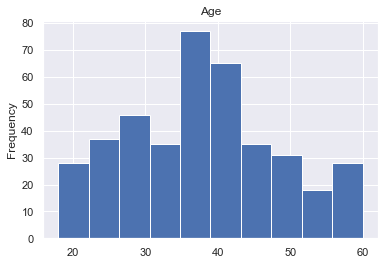

In [37]:
sales['Age'].plot(kind='hist', bins=10, title='Age');

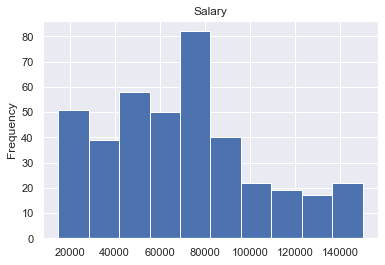

In [38]:
sales['EstimatedSalary'].plot(kind='hist', bins=10, title='Salary');

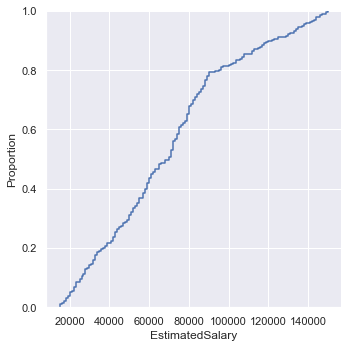

In [40]:
sns.displot(sales['EstimatedSalary'], kind='ecdf')
plt.show()

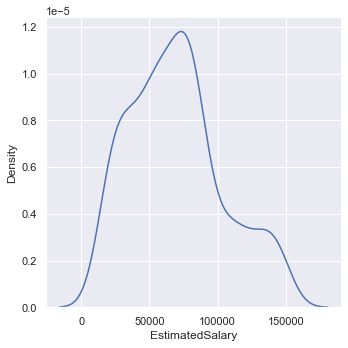

In [41]:
sns.displot(sales['EstimatedSalary'], kind='kde')
plt.show()

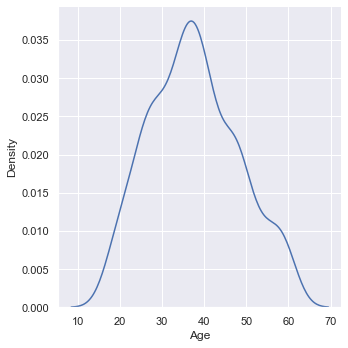

In [42]:
sns.displot(sales['Age'], kind='kde')
plt.show()

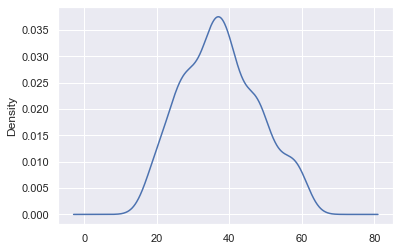

In [45]:
sales['Age'].plot(kind='density');

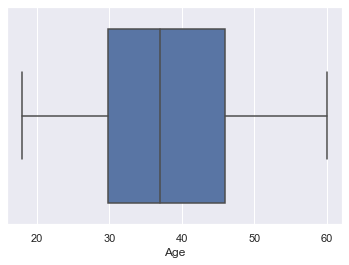

In [47]:
sns.boxplot(sales=sales, x='Age')
plt.show()

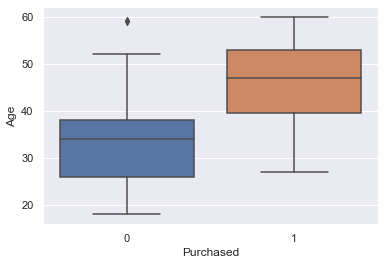

In [49]:
sns.boxplot(x='Purchased',y='Age',sales=sales)
plt.show()

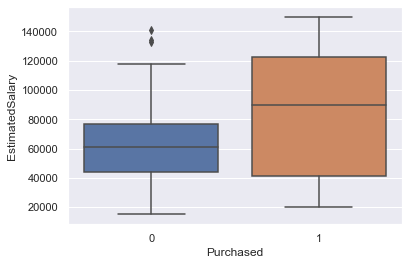

In [51]:
sns.boxplot(x='Purchased',y='EstimatedSalary',sales=sales)
plt.show()

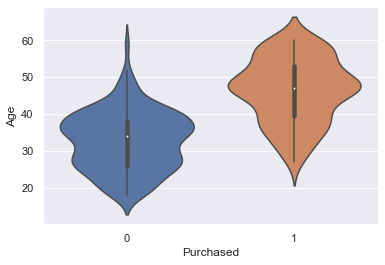

In [52]:
sns.violinplot(x='Purchased', y='Age', sales=sales)
plt.show()

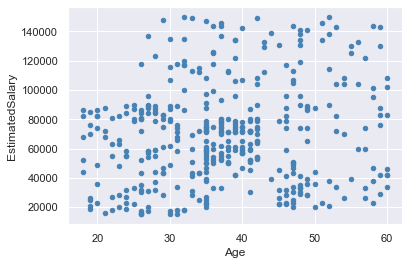

In [71]:
from matplotlib import cm
sales.plot(kind='scatter', x='Age', y='EstimatedSalary', c='steelblue')
plt.show()

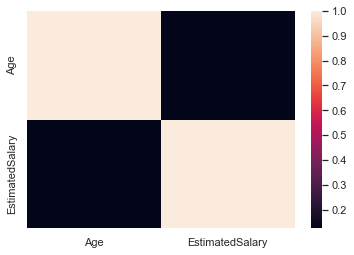

In [73]:
sns.heatmap(sales[['Age','EstimatedSalary']].corr(method = "spearman"))
plt.show()

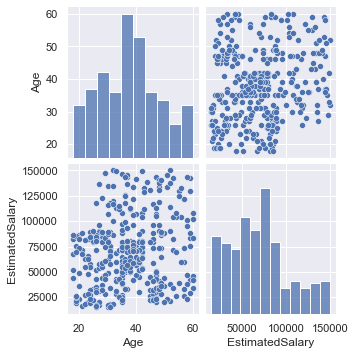

In [77]:
#Resumen
sns.pairplot(sales[['Age','EstimatedSalary']])
plt.show()

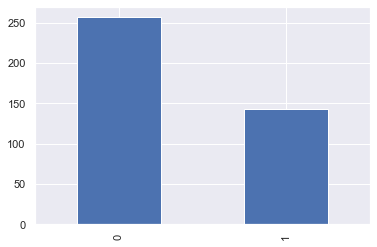

In [78]:
sales['Purchased'].value_counts().plot.bar()
plt.show()

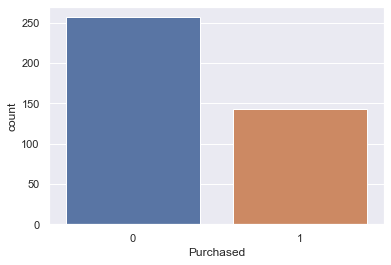

In [80]:
sns.countplot(sales=sales, x='Purchased')
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


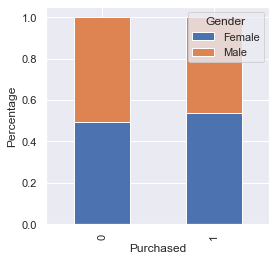

In [82]:
print(pd.crosstab(sales["Purchased"], sales["Gender"]))
Gender = pd.crosstab(sales["Purchased"], sales["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",
                                                    stacked=True,
                                                    figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [83]:
# Prueba Chi-Cuadrado
# Ho: no existe dependencia entre las variables
# Ha: existe dependencia entre las variables
 
# Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables
# Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables

In [84]:
contigencia = pd.crosstab(sales['Purchased'], sales['Gender']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

0.45624659183130645
